In [12]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
import matplotlib
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"} # Make sure the axis background of plots is white, this is usefull for the black theme in JupyterLab
# Initialize default seaborn layout
sns.set_palette(sns.hls_palette(8, l=.3, s=.8))
sns.set(style='ticks')

In [13]:
#Chip14_P1_poort2_droog_04122019.txt
a = str(4)
b = str(5)

measurement = 'Chip 14 p'+a+' input '+b


x = np.loadtxt("lambda.txt")
y = np.loadtxt("Chn1.txt")

df = pd.DataFrame([x,y[0,:]]).T

df.columns = ['l', 'I'] # wavelength (nm) and relative intensity (%)

print(measurement)

df.head()

Chip 14 p4 input 5


,l,I
0,1525.000,-31.741995
1,1525.001,-31.749308
2,1525.002,-31.687798
3,1525.003,-31.593647
4,1525.004,-31.497440


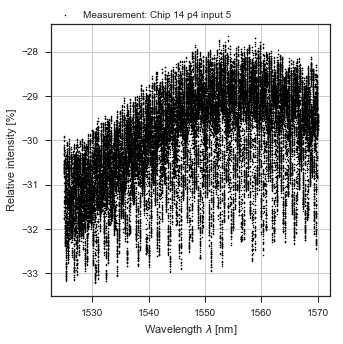

In [14]:
# x axis limits
xlim = True # True if you want to use x axis limits
x_min = 1563
x_max = 1564

#df = df[(df.l >= x_min) & (df.l <= x_max)]



plt.figure(figsize=((5,5)))
plt.plot(df.l, df.I, '.', linewidth=0.5, marker='.', ms=3, color='black', label='Measurement: '+measurement)
    
plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]')
plt.ylabel(r'Relative intensity [%]')
plt.legend(loc=(0,1))

In [15]:
df.I.mean(), df.I.std()

(-30.058083883558066, 1.085169287382871)

Piek golflengte: 


(None, 2.5778923507711453)

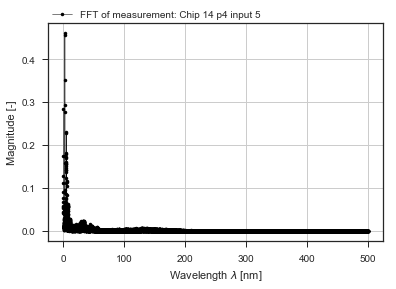

In [16]:
# Number of samplepoints
N = len(df.l)
# sample spacing
T = np.abs(df.l.diff())[1:].mean() # Gemiddelde T van alle punten
x = df.l
y = df.I

yf = scipy.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

fft_y = 2.0/N * np.abs(yf[:N//2])

df_fft = pd.DataFrame([xf, fft_y]).T
df_fft.columns = ['lamb', 'I']

df_fft = df_fft[df_fft.lamb>0.03] # filter op lambda >0.03 (om de piek bij 0 er uit te halen)
df_fft = df_fft.reset_index(drop=True)


plt.plot(df_fft.lamb, df_fft.I, '.-', linewidth=0.5, marker='.', color='black', label='FFT of measurement: '+measurement)

plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]')
plt.ylabel(r'Magnitude [-]')
plt.legend(loc=(0,1))


y_max = df_fft.I.idxmax()
x_max = df_fft.lamb[y_max]


print("Piek golflengte: "),x_max

# Verschil in piek waarde bij fft met gemiddelde T en gemiddeld piek waarde bij individuele T waarden

# Resultaat

In [17]:
from scipy.signal import find_peaks

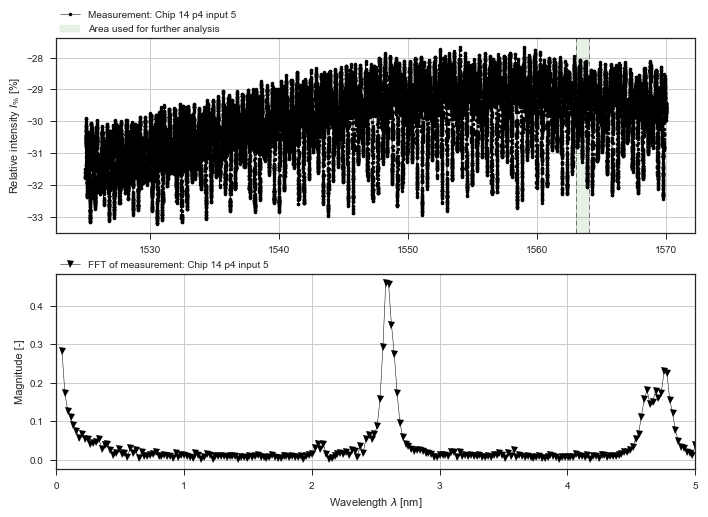

In [18]:
fontsize=12

xlim = False
xmin = 1530
xmax = 1535

matplotlib.rcParams.update({'font.size': fontsize})

plt.figure(figsize=(10,7))

plt.subplot(2,1,1)
plt.plot(df.l, df.I, '.-', linewidth=0.5, marker='.', color='black', label='Measurement: '+measurement)

plt.axvline(x=1563,  linewidth=0.75, color='black', linestyle='-.', alpha=0.7, label='__nolabel__')
plt.axvline(x=1564,  linewidth=0.75, color='black', linestyle='-.', alpha=0.7, label='__nolabel__')
plt.axvspan(1563, 1564, alpha=0.1, color='green', label='Area used for further analysis')

plt.legend(loc=(0,1), frameon=False)
plt.grid()
#plt.xlabel(r'Wavelength $\lambda$ [nm]', fontsize=fontsize)
plt.ylabel(r'Relative intensity $I_\%$ [%]')

if xlim:
    plt.xlim((xmin,xmax))

peaks , _ = find_peaks(df_fft.I, prominence=1, height=1.5)


#plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=100, hspace=None)

plt.subplot(2,1,2)
plt.plot(df_fft.lamb, df_fft.I, '.-', linewidth=0.5, marker='v', color='black', label='FFT of measurement: '+measurement)
plt.plot(df_fft.lamb[peaks], df_fft.I[peaks], 'o', ms=12,markerfacecolor='none',markeredgewidth=1, markeredgecolor='red', label='_nolegend_') # peaks
plt.xlim((0,5))
plt.legend(loc=(0,1), frameon=False)
plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]')
plt.ylabel(r'Magnitude [-]')

for i_x, i_y in zip(df_fft.lamb[peaks], df_fft.I[peaks]):
    plt.text(i_x+0.05, i_y, '{:2.3f} nm'.format(i_x, i_y))

plt.tight_layout()
plt.savefig('figuren\\Chip_14_p4_input_5.png', dpi=300)
#plt.savefig('figuren\\'+measurement+'.png', dpi=150)

# Lorentz fit

In [19]:
from scipy.optimize import curve_fit

def lorentzian_pdf(x, x0, gamma, c=0):
    if gamma <= 0:
        return 0
    return 1/(np.pi*gamma*(1+((x-x0)/gamma)**2)) + c

def lorentzian_pdf_3(x, x00, gamma0, x01, gamma1, x02, gamma2, a, b, c):

    y = lorentzian_pdf(x=x, x0=x00, gamma=gamma0) + lorentzian_pdf(x=x, x0=x01, gamma=gamma1) + lorentzian_pdf(x=x, x0=x02, gamma=gamma2) - a*x**2 - b*x  +c

    return -y

Text(0,0.5,'Relative intensity [%]')

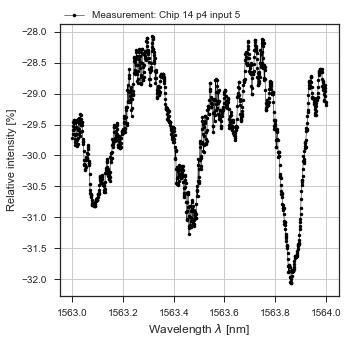

In [30]:
df1 = df[df.l.between(1563, 1564)] # selecteer een golflengte bereik
df1 = df1.reset_index(drop=True)

plt.figure(figsize=(5,7.5))


plt.plot(df1.l, df1.I, '.-', linewidth=0.5, marker='.', color='black', label='Measurement: '+measurement)
plt.legend(loc=(0,1), frameon=False)
plt.grid()
plt.xlabel(r'Wavelength $\lambda$ [nm]', fontsize=fontsize)
plt.ylabel(r'Relative intensity [%]')

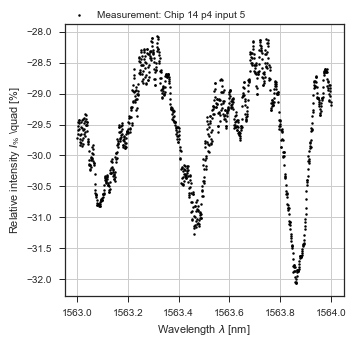

In [40]:
plt.figure(figsize=((5,5)))


n = 2

#x = np.arange(-15, 15, 0.05)
#y = lorentzian_pdf_8(x, x00, gamma0, x01, gamma1, x02, gamma2, x03, gamma3 , x04, gamma4 , x05, gamma5, x06, gamma6, x07, gamma7, a,b,c)

x = df1.l
y = df1.I

# 1 std van ruis is gelijk aan 3.8
#plt.errorbar(x, y, fmt='o', yerr=0.5, xerr=10*10**(-12), ms=5, elinewidth=1, capthick=0.75, capsize=5, color='black', label='Measurement: '+measurement)
plt.plot(x, y, '.', linewidth=0.5, marker='.', ms=5, color='black', label='Measurement: '+measurement)

plt.grid()
plt.legend(loc=(0,1), frameon=False)


plt.xlabel('Wavelength $\lambda$ [nm]')
plt.ylabel('Relative intensity $I_\%$ \quad [%]')

plt.savefig("figuren\\tno_p4.png", dpi=300)

1563.1700622483904 0.033546030272410016 1563.4547341134582 0.03691786025804656 1563.6444549781404 0.0414678724376066 1.5327223991326535e-42 1.1024132510397525e-225 -9.615229271060884e-233


Text(0,0.5,'Relative intensity $I_\\%$ \\quad [%]')

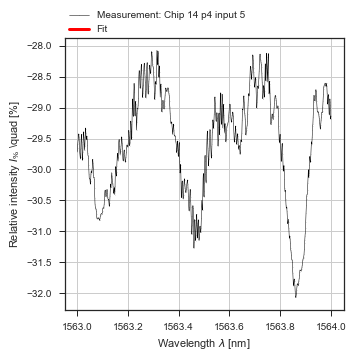

In [32]:
# fit het signaal met ruis
#popt, pcov = curve_fit(lorentzian_pdf_2, x, ydata, bounds=([-50 for _ in range(7)], [10 for _ in range(7)])) # range 7 voor 7 variabelen

parguess = (1563.08, 0.01, 1563.47, 0.01, 1563.86, 0.01, 0.1, 0.005, -30) # parameter values guess


"""
LET OP, zeer gevoelig voor initiele parameter guesses !!
"""
popt, pcov = curve_fit(f=lorentzian_pdf_3, xdata=x, ydata=y, p0=parguess, bounds=([1562.8, 0, 1563, 0 , 1563, 0, 0, 0, -60],[1563.5, 1, 1564, 1, 1564, 1, 1, 1, 0]))
# plot punten
#plt.plot(x, y, '.', marker='.', ms=4, color='black')

x = np.arange(df1.l.iloc[-1]-0.03, df1.l.iloc[0]+0.03, 0.001) # indices -1 tot 0 omdat de golflengte afneemd per index
# plot fit
yfit = lorentzian_pdf_3(x, *popt)

#print(x)
#*variabelen = *popt

print(*popt)

plt.plot(x, yfit, 'r-', linewidth=3, label='Fit')

plt.grid()
plt.legend(loc=(0,1), frameon=False)


plt.xlabel('Wavelength $\lambda$ [nm]')
plt.ylabel('Relative intensity $I_\%$ \quad [%]')


#plt.savefig("figuren\\lorentz_fit_hhs.png", dpi=300)

In [22]:
def FWHM(gamma): 
    return 2*gamma

x00, gamma0, x01, gamma1, x02, gamma2, a, b, c = (*popt,)

fwhm0 = FWHM(gamma0)
fwhm1 = FWHM(gamma1)
fwhm2 = FWHM(gamma2)

fwhm = np.array([fwhm0, fwhm1, fwhm2])


print("FWHM mean: ", fwhm.mean())
print("FWHM std: ", fwhm.std())
print("FWHM all values: ", fwhm)


x0s = np.array([x00, x01, x02]) # array met alle x0's

x0s = np.sort(x0s, axis=-1) # sorteer laag naar hoog

print("x0 values: ", x0s)

FSR = np.diff(x0s) # bereken verschil tussen array elementen

print("FSR values: ", FSR)

FSR.mean(), FSR.std()

FWHM mean:  0.10000000000000002
FWHM std:  0.0
FWHM all values:  [0.1 0.1 0.1]
x0 values:  [1563.19711656 1563.45513421 1563.65016594]
FSR values:  [0.25801766 0.19503172]


(0.22652468990793295, 0.03149296760591369)

In [43]:
np.array([0.2,0.15,0.1]).mean()


0.15